In [1]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Dataset Info:
Shape: (3141, 10)
Columns: ['CountyState_FIPS', 'County_Name_wState_Abbreviation', 'State', 'COUNTYNM', 'Level_of_Maternity_Care_0mcd_1Low_2mod_3access', 'Level_of_Maternity_Care_Label', 'GroupLevel', 'MapGeoColor', 'MapGeoId', 'MapGeoInfo']

First few rows:
  CountyState_FIPS County_Name_wState_Abbreviation    State COUNTYNM  \
0             1001                Autauga, Alabama  Alabama  Autauga   
1             1003                Baldwin, Alabama  Alabama  Baldwin   
2             1005                Barbour, Alabama  Alabama  Barbour   
3             1007                   Bibb, Alabama  Alabama     Bibb   
4             1009                 Blount, Alabama  Alabama   Blount   

   Level_of_Maternity_Care_0mcd_1Low_2mod_3access  \
0                                               1   
1                                               3   
2                                               1   
3                                               3   
4                            

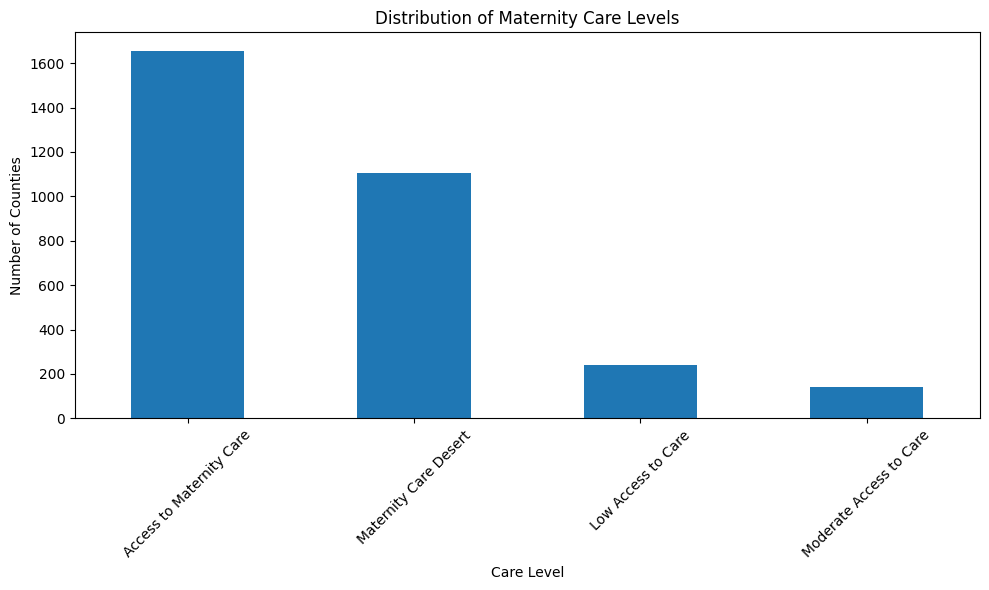


States with most counties in dataset:
State
Texas             254
Georgia           159
Virginia          133
Kentucky          120
Missouri          115
Kansas            105
Illinois          102
North Carolina    100
Iowa               99
Tennessee          95
Name: count, dtype: int64

Top 10 states by county count - Care Level Breakdown:
Level_of_Maternity_Care_Label  Access to Maternity Care  Low Access to Care  \
State                                                                         
Alabama                                              28                  14   
Alaska                                               14                   0   
Arizona                                              14                   0   
Arkansas                                             27                   4   
California                                           50                   1   
Colorado                                             38                   3   
Connecticut           

In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Method 1: Load JSON directly into pandas
def load_map_data_from_json(file_path):
    """Load the extracted map data JSON into a pandas DataFrame"""
    
    # Read JSON file
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Clean up column names (remove special characters, make them more readable)
    df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_')
    
    # Convert numeric columns
    numeric_columns = ['Level_of_Maternity_Care_0mcd_1Low_2mod_3access', 'MapGeoColor']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

# Method 2: If you want to paste JSON directly in notebook
def load_from_json_string(json_string):
    """Load from JSON string (useful if you want to paste directly)"""
    
    data = json.loads(json_string)
    df = pd.DataFrame(data)
    
    # Clean column names
    df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_')
    
    return df

# Load the data
# Replace 'map-data.json' with your actual file path
df = load_map_data_from_json('map-data.json')

# Basic data exploration
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

# Data Analysis Examples
print("\n" + "="*50)
print("DATA ANALYSIS")
print("="*50)

# 1. Maternity Care Level Distribution
if 'Level_of_Maternity_Care_Label' in df.columns:
    print("\nMaternity Care Level Distribution:")
    care_distribution = df['Level_of_Maternity_Care_Label'].value_counts()
    print(care_distribution)
    
    # Visualization
    plt.figure(figsize=(10, 6))
    care_distribution.plot(kind='bar')
    plt.title('Distribution of Maternity Care Levels')
    plt.xlabel('Care Level')
    plt.ylabel('Number of Counties')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 2. State-wise Analysis
if 'State' in df.columns:
    print("\nStates with most counties in dataset:")
    state_counts = df['State'].value_counts().head(10)
    print(state_counts)
    
    # State-wise care level analysis
    if 'Level_of_Maternity_Care_Label' in df.columns:
        state_care_crosstab = pd.crosstab(df['State'], df['Level_of_Maternity_Care_Label'])
        print(f"\nTop 10 states by county count - Care Level Breakdown:")
        print(state_care_crosstab.head(10))

# 3. Export to different formats for further analysis
print("\n" + "="*50)
print("EXPORTING TO DIFFERENT FORMATS")
print("="*50)


df.to_csv('maternity_care_data.csv', index=False)
print("✅ Exported to CSV: maternity_care_data.csv")


with pd.ExcelWriter('maternity_care_analysis.xlsx') as writer:
    df.to_excel(writer, sheet_name='Raw_Data', index=False)
    
    if 'Level_of_Maternity_Care_Label' in df.columns:
        care_distribution.to_excel(writer, sheet_name='Care_Level_Summary')
    
    if 'State' in df.columns:
        state_counts.to_excel(writer, sheet_name='State_Summary')
        
        if 'Level_of_Maternity_Care_Label' in df.columns:
            state_care_crosstab.to_excel(writer, sheet_name='State_Care_Crosstab')

print("✅ Exported to Excel: maternity_care_analysis.xlsx")


df.to_json('cleaned_maternity_care_data.json', orient='records', indent=2)
print("✅ Exported cleaned JSON: cleaned_maternity_care_data.json")

# Create summary statistics
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)


numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print("Numeric column summaries:")
    print(df[numeric_cols].describe())

categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {len(categorical_cols)}")
for col in categorical_cols[:5]:  # Show first 5 categorical columns
    print(f"\n{col} - Unique values: {df[col].nunique()}")
    if df[col].nunique() <= 10:
        print(df[col].value_counts().head())

print("\n🎉 Data analysis complete! Check the exported files.")

In [3]:
import pandas as pd

df = pd.read_csv("maternity_care_data.csv")

df.head()


,CountyState_FIPS,County_Name_wState_Abbreviation,State,COUNTYNM,Level_of_Maternity_Care_0mcd_1Low_2mod_3access,Level_of_Maternity_Care_Label,GroupLevel,MapGeoColor,MapGeoId,MapGeoInfo
0,1001,"Autauga, Alabama",Alabama,Autauga,1,Low Access to Care,GroupLevel1,1,1001,Level of Maternity Care: Low Access to Care
1,1003,"Baldwin, Alabama",Alabama,Baldwin,3,Access to Maternity Care,GroupLevel3,3,1003,Level of Maternity Care: Access to Maternity Care
2,1005,"Barbour, Alabama",Alabama,Barbour,1,Low Access to Care,GroupLevel1,1,1005,Level of Maternity Care: Low Access to Care
3,1007,"Bibb, Alabama",Alabama,Bibb,3,Access to Maternity Care,GroupLevel3,3,1007,Level of Maternity Care: Access to Maternity Care
4,1009,"Blount, Alabama",Alabama,Blount,0,Maternity Care Desert,GroupLevel0,0,1009,Level of Maternity Care: Maternity Care Desert


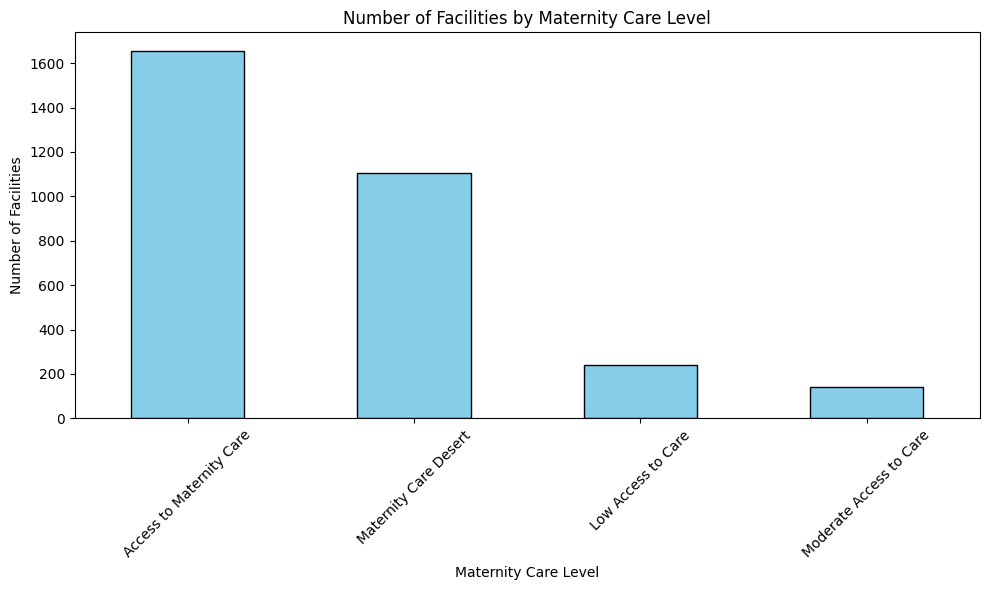

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("maternity_care_data.csv")

# Count the number of facilities by care level
level_counts = df['Level_of_Maternity_Care_Label'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
level_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Number of Facilities by Maternity Care Level")
plt.xlabel("Maternity Care Level")
plt.ylabel("Number of Facilities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
pip install geopandas matplotlib



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load maternity care data
df = pd.read_csv("maternity_care_data.csv")

# Format FIPS as 5-digit strings
df['CountyState_FIPS'] = df['CountyState_FIPS'].astype(str).str.zfill(5)

# Count number of facilities per county (or any logic you want)
facility_counts = df['CountyState_FIPS'].value_counts().reset_index()
facility_counts.columns = ['CountyState_FIPS', 'FacilityCount']


In [7]:
# Load county shapefile directly from Census Bureau TIGER/Line
shapefile_url = "https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_county_5m.zip"
gdf = gpd.read_file(shapefile_url)

# Create full 5-digit FIPS code
gdf['CountyState_FIPS'] = gdf['STATEFP'] + gdf['COUNTYFP']


In [8]:
pip install -U kaleido


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


📊 Creating Interactive County Map
Dataset shape: (3141, 10)
Available columns: ['CountyState_FIPS', 'County_Name_wState_Abbreviation', 'State', 'COUNTYNM', 'Level_of_Maternity_Care_0mcd_1Low_2mod_3access', 'Level_of_Maternity_Care_Label', 'GroupLevel', 'MapGeoColor', 'MapGeoId', 'MapGeoInfo']
✅ Using FIPS column: CountyState_FIPS

🗺️  Generating Maps...
Unique care levels found: ['Low Access to Care' 'Access to Maternity Care' 'Maternity Care Desert'
 'Moderate Access to Care']
✅ Created Care Level Map


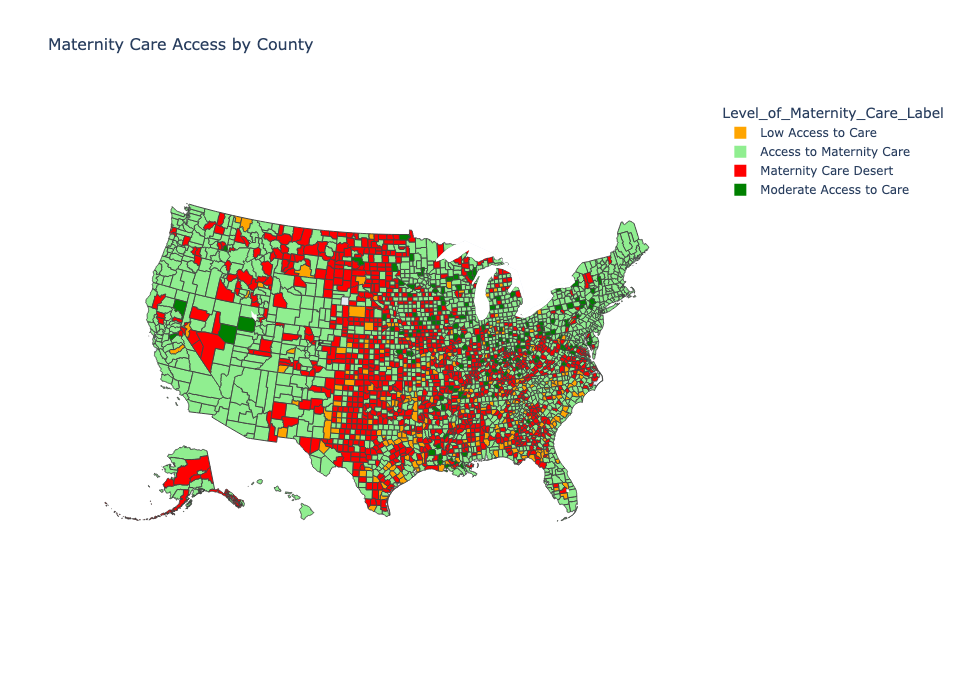

   💾 Saved as: maternity_care_map.html
✅ Created Numeric Map


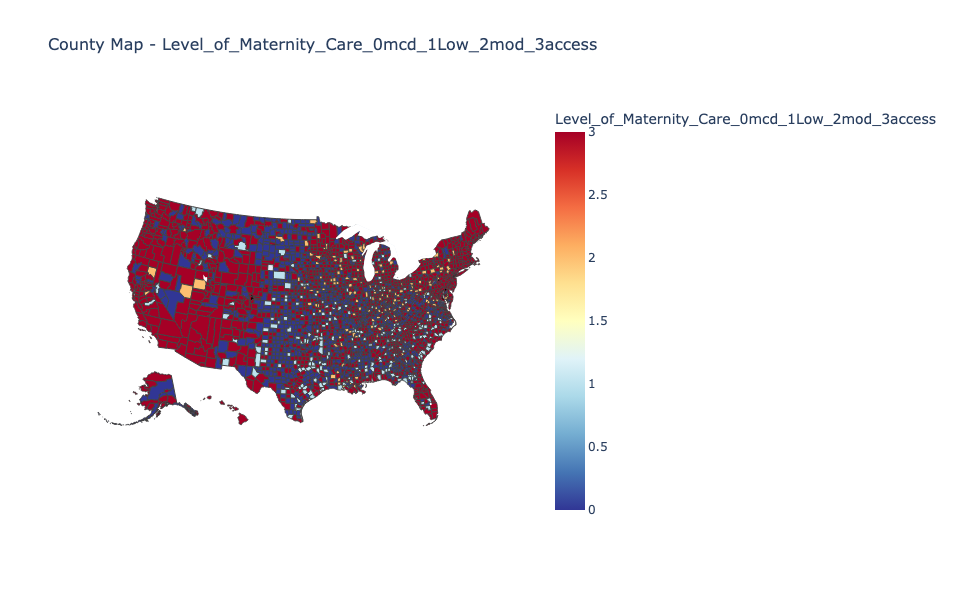

   💾 Saved as: numeric_county_map.html
✅ Created Density Map


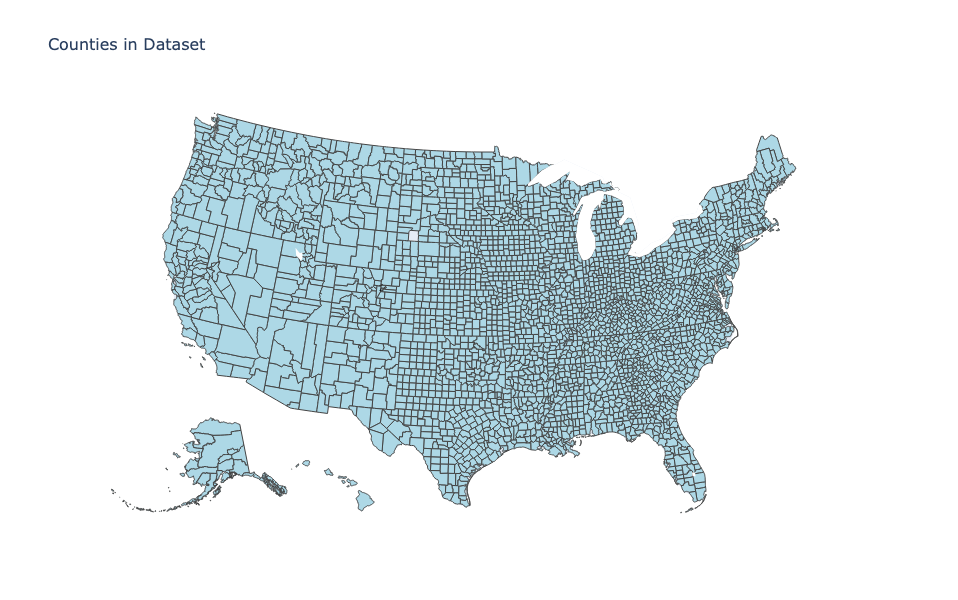

   💾 Saved as: counties_density_map.html

📈 Mapping Summary:
   • Total counties mapped: 3141
   • FIPS codes range: 01001 to 56045
   • States represented: 51

🎉 Map creation complete!
   • Open the .html files in your browser to view interactive maps
   • Maps are zoomable and hoverable for detailed information
🖼️  Saved care level map as PNG: care_deserts.png


In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import json

# Load your CSV data
# REPLACE 'maternity_care_data.csv' with your actual filename
df = pd.read_csv('maternity_care_data.csv')

print("📊 Creating Interactive County Map")
print("=" * 40)

# Check the data structure
print(f"Dataset shape: {df.shape}")
print(f"Available columns: {list(df.columns)}")

# Check if CountyState_FIPS column exists
fips_column = None
for col in df.columns:
    if 'fips' in col.lower() or 'CountyState_FIPS' in col:
        fips_column = col
        break

if fips_column is None:
    print("❌ FIPS column not found. Available columns:")
    for col in df.columns:
        print(f"   • {col}")
    print("\nPlease check your column name and update the script.")
else:
    print(f"✅ Using FIPS column: {fips_column}")

# Ensure FIPS codes are properly formatted (5-digit strings with leading zeros)
df[fips_column] = df[fips_column].astype(str).str.zfill(5)

# Method 1: Using Plotly with built-in US counties
def create_basic_county_map(df, fips_col, value_col, title="County Map"):
    """Create a basic county choropleth map"""
    
    fig = px.choropleth(
        df,
        geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
        locations=fips_col,
        color=value_col,
        hover_name='County_Name_wState_Abbreviation' if 'County_Name_wState_Abbreviation' in df.columns else None,
        hover_data={col: True for col in df.columns if col in ['State', 'Level_of_Maternity_Care_Label']},
        color_continuous_scale="RdYlBu_r",
        scope="usa",
        title=title
    )
    
    fig.update_layout(
        title_font_size=16,
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='albers usa'
        ),
        width=1000,
        height=600
    )
    
    return fig

# Method 2: Categorical mapping for care levels
def create_care_level_map(df, fips_col):
    """Create a map colored by maternity care levels"""
    
    # Find the care level column
    care_col = None
    for col in df.columns:
        if 'care' in col.lower() and 'label' in col.lower():
            care_col = col
            break
    
    if care_col is None:
        print("❌ Care level column not found")
        return None
    
    # Create color mapping for care levels - UPDATED COLORS
    unique_levels = df[care_col].unique()
    print(f"Unique care levels found: {unique_levels}")
    
    # Comprehensive color mapping to handle different possible category names
    color_map = {
        # Maternity care deserts - RED
        'No Care Available': '#FF0000',
        'Maternity Care Desert': '#FF0000',
        'Desert': '#FF0000',
        'No Access': '#FF0000',
        
        # Low access - ORANGE  
        'Low Access to Care': '#FFA500',
        'Low Access': '#FFA500',
        'Limited Access': '#FFA500',
        
        # Moderate access - GREEN
        'Moderate Access': '#008000',
        'Moderate Access to Care': '#008000',
        'Some Access': '#008000',
        
        # Full access - VERY LIGHT GREEN
        'Access to Maternity Care': '#90EE90',
        'Full Access': '#90EE90',
        'Good Access': '#90EE90',
        'Adequate Access': '#90EE90'
    }
    
    # If we don't find exact matches, create a fallback mapping
    if not any(level in color_map for level in unique_levels):
        # Create mapping based on order or keywords
        level_to_color = {}
        for level in unique_levels:
            level_lower = str(level).lower()
            if 'desert' in level_lower or 'no' in level_lower:
                level_to_color[level] = '#FF0000'  # Red
            elif 'low' in level_lower or 'limited' in level_lower:
                level_to_color[level] = '#FFA500'  # Orange
            elif 'moderate' in level_lower or 'some' in level_lower:
                level_to_color[level] = '#008000'  # Green
            elif 'full' in level_lower or 'good' in level_lower or 'adequate' in level_lower:
                level_to_color[level] = '#90EE90'  # Very light green
            else:
                level_to_color[level] = '#CCCCCC'  # Gray for unknown
        color_map.update(level_to_color)
    
    # Map colors to values
    df['color_code'] = df[care_col].map(color_map)
    
    fig = px.choropleth(
        df,
        geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
        locations=fips_col,
        color=care_col,
        hover_name='County_Name_wState_Abbreviation' if 'County_Name_wState_Abbreviation' in df.columns else None,
        hover_data={
            'State': True,
            care_col: True,
            'COUNTYNM': True if 'COUNTYNM' in df.columns else False
        },
        color_discrete_map=color_map,
        scope="usa",
        title="Maternity Care Access by County"
    )
    
    fig.update_layout(
        title_font_size=16,
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='albers usa'
        ),
        width=1200,
        height=700,
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=1.01
        )
    )
    
    return fig

# Method 3: Create numeric map if numeric column exists
def create_numeric_map(df, fips_col):
    """Create map with numeric values"""
    
    # Find numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    if len(numeric_cols) == 0:
        return None
    
    # Use first numeric column or look for specific patterns
    value_col = numeric_cols[0]
    for col in numeric_cols:
        if 'level' in col.lower() or 'care' in col.lower():
            value_col = col
            break
    
    fig = create_basic_county_map(df, fips_col, value_col, f"County Map - {value_col}")
    return fig

# Generate the maps
print(f"\n🗺️  Generating Maps...")

if fips_column:
    # Map 1: Care Level Map (if available)
    care_map = create_care_level_map(df, fips_column)
    if care_map:
        print("✅ Created Care Level Map")
        care_map.show()
        # Save as HTML
        care_map.write_html("maternity_care_map.html")
        print("   💾 Saved as: maternity_care_map.html")
    
    # Map 2: Numeric Map (if available)
    numeric_map = create_numeric_map(df, fips_column)
    if numeric_map:
        print("✅ Created Numeric Map")
        numeric_map.show()
        # Save as HTML
        numeric_map.write_html("numeric_county_map.html")
        print("   💾 Saved as: numeric_county_map.html")
    
    # Map 3: Simple density map
    fig_density = px.choropleth(
        df,
        geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
        locations=fips_column,
        color_discrete_sequence=['lightblue'],
        scope="usa",
        title="Counties in Dataset"
    )
    
    fig_density.update_layout(
        title_font_size=16,
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='albers usa'
        ),
        width=1000,
        height=600,
        showlegend=False
    )
    
    print("✅ Created Density Map")
    fig_density.show()
    fig_density.write_html("counties_density_map.html")
    print("   💾 Saved as: counties_density_map.html")

# Data summary for mapping
print(f"\n📈 Mapping Summary:")
print(f"   • Total counties mapped: {len(df)}")
print(f"   • FIPS codes range: {df[fips_column].min()} to {df[fips_column].max()}")
print(f"   • States represented: {df['State'].nunique() if 'State' in df.columns else 'Unknown'}")

# Check for any potential issues
invalid_fips = df[df[fips_column].str.len() != 5]
if len(invalid_fips) > 0:
    print(f"   ⚠️  Warning: {len(invalid_fips)} counties have invalid FIPS codes")
    print("   Invalid FIPS examples:", invalid_fips[fips_column].head().tolist())

print(f"\n🎉 Map creation complete!")
print("   • Open the .html files in your browser to view interactive maps")
print("   • Maps are zoomable and hoverable for detailed information")

import plotly.io as pio  # Required for saving images with Kaleido

# Save care level map as PNG using Kaleido
if care_map:
    try:
        care_map.write_image("care_deserts.png", width=1200, height=700, scale=2)
        print("🖼️  Saved care level map as PNG: care_deserts.png")
    except Exception as e:
        print("❌ Failed to save PNG even though Kaleido is installed.")
        print(f"   Error: {e}")



In [11]:
import plotly.io as pio  # Required for saving images with Kaleido

# Save care level map as SVG using Kaleido
if care_map:
    try:
        care_map.write_image("care_deserts.svg", format="svg", width=1200, height=700, scale=2)
        print("🖼️  Saved care level map as SVG: care_deserts.svg")
    except Exception as e:
        print("❌ Failed to save SVG. Make sure Kaleido is installed.")
        print(f"   Error: {e}")

# Save numeric map as SVG using Kaleido
if numeric_map:
    try:
        numeric_map.write_image("numeric_county_map.svg", format="svg", width=1200, height=700, scale=2)
        print("🖼️  Saved numeric map as SVG: numeric_county_map.svg")
    except Exception as e:
        print("❌ Failed to save SVG. Make sure Kaleido is installed.")
        print(f"   Error: {e}")

# Save density map as SVG using Kaleido
try:
    fig_density.write_image("counties_density_map.svg", format="svg", width=1000, height=600, scale=2)
    print("🖼️  Saved density map as SVG: counties_density_map.svg")
except Exception as e:
    print("❌ Failed to save SVG. Make sure Kaleido is installed.")
    print(f"   Error: {e}")


🖼️  Saved care level map as SVG: care_deserts.svg
🖼️  Saved numeric map as SVG: numeric_county_map.svg
🖼️  Saved density map as SVG: counties_density_map.svg


In [12]:
import plotly.io as pio  # Required for saving images with Kaleido

# Save Care Level Map (color coded) as SVG
if care_map:
    try:
        care_map.update_traces(marker=dict(line=dict(width=0)))  # prevent white outlines
        care_map.write_image(
            "care_deserts.svg",
            format="svg",
            width=1200,
            height=700,
            scale=2
        )
        print("🖼️  Saved care level map as SVG with color coding: care_deserts.svg")
    except Exception as e:
        print("❌ Failed to save care level map as SVG.")
        print(f"   Error: {e}")

# Save Numeric Map (if any) as SVG
if numeric_map:
    try:
        numeric_map.update_traces(marker=dict(line=dict(width=0)))
        numeric_map.write_image(
            "numeric_county_map.svg",
            format="svg",
            width=1200,
            height=700,
            scale=2
        )
        print("🖼️  Saved numeric map as SVG: numeric_county_map.svg")
    except Exception as e:
        print("❌ Failed to save numeric map as SVG.")
        print(f"   Error: {e}")

# Save Density Map as SVG
try:
    fig_density.update_traces(marker=dict(line=dict(width=0)))
    fig_density.write_image(
        "counties_density_map.svg",
        format="svg",
        width=1000,
        height=600,
        scale=2
    )
    print("🖼️  Saved density map as SVG: counties_density_map.svg")
except Exception as e:
    print("❌ Failed to save density map as SVG.")
    print(f"   Error: {e}")


🖼️  Saved care level map as SVG with color coding: care_deserts.svg
🖼️  Saved numeric map as SVG: numeric_county_map.svg
🖼️  Saved density map as SVG: counties_density_map.svg


In [10]:
pip install --upgrade kaleido


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install plotly


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


📊 Creating Simple State-Level Visualization
Available columns:
  1. CountyState_FIPS
  2. County_Name_wState_Abbreviation
  3. State
  4. COUNTYNM
  5. Level_of_Maternity_Care_0mcd_1Low_2mod_3access
  6. Level_of_Maternity_Care_Label
  7. GroupLevel
  8. MapGeoColor
  9. MapGeoId
  10. MapGeoInfo


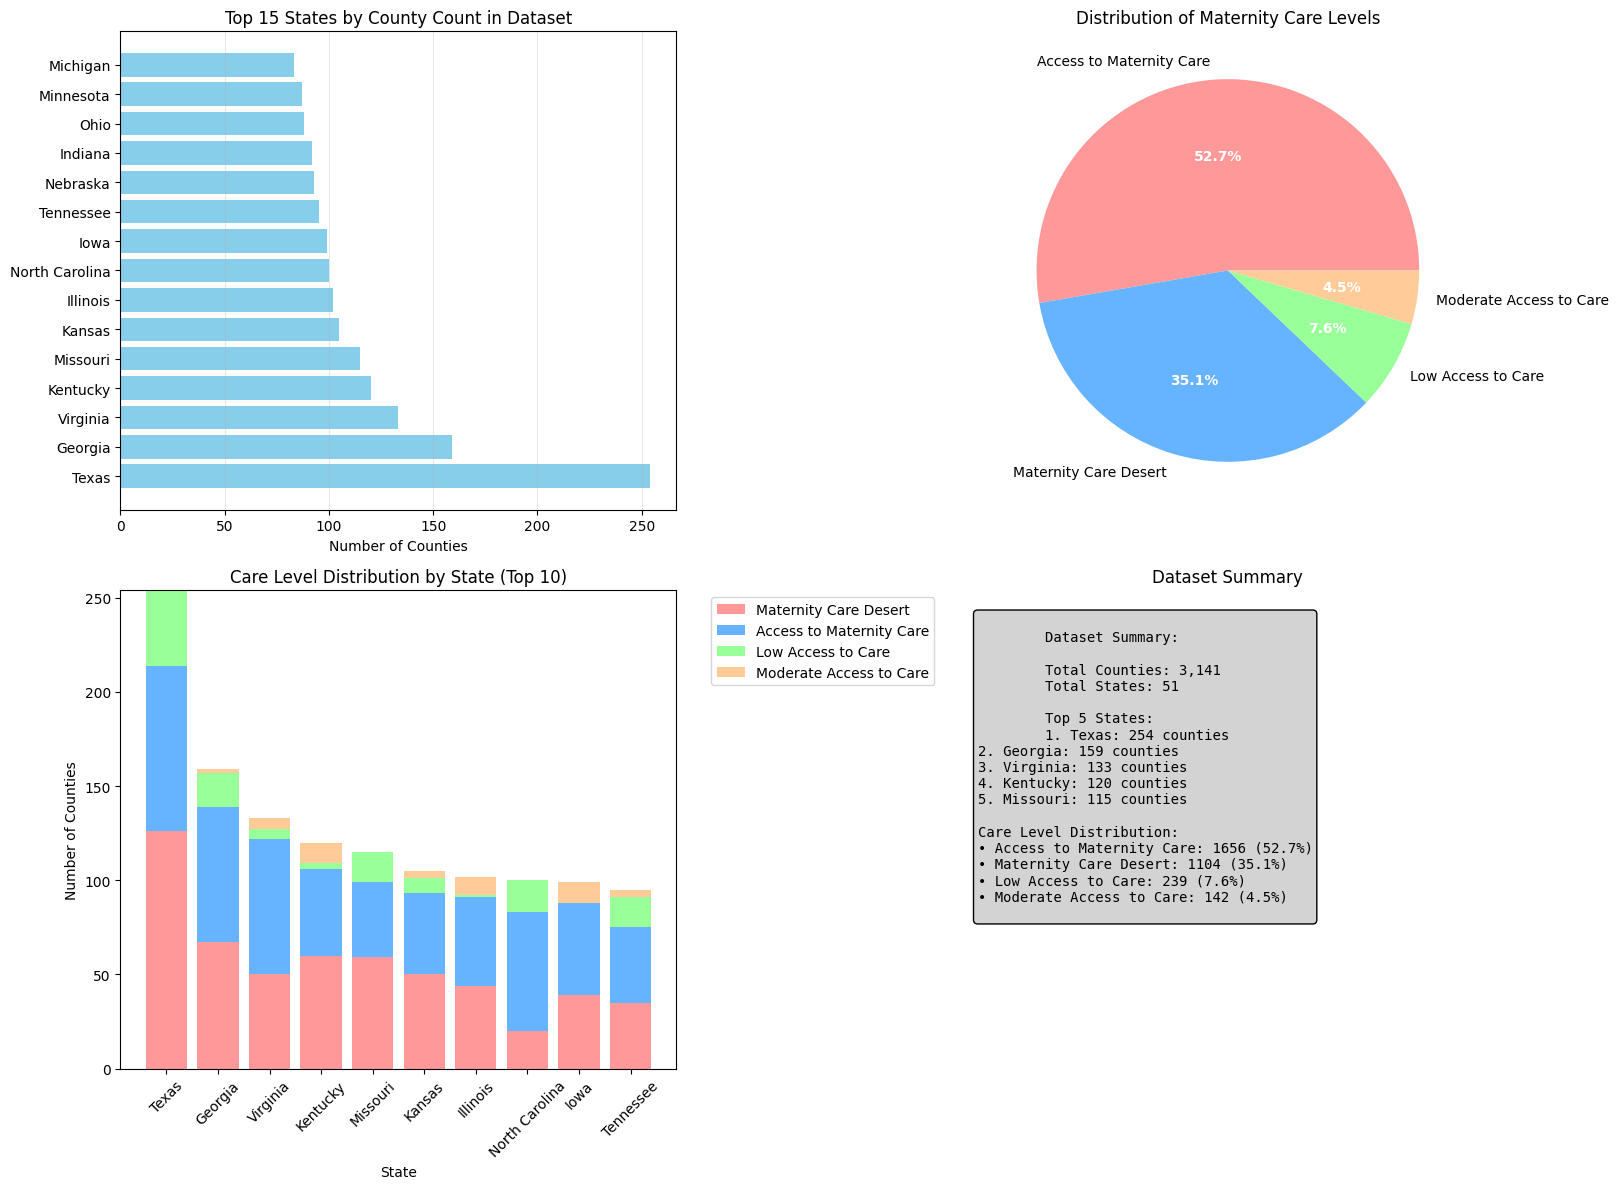

✅ Created state-level visualization
💾 Saved as: maternity_care_state_analysis.png

📋 Quick Data Overview:
Dataset shape: (3141, 10)
Memory usage: 1.46 MB
FIPS column found: CountyState_FIPS
Sample FIPS codes: [1001, 1003, 1005, 1007, 1009]

Top 10 State FIPS codes (first 2 digits):
  48: 254 counties
  13: 159 counties
  51: 133 counties
  21: 120 counties
  29: 115 counties
  20: 105 counties
  17: 102 counties
  37: 100 counties
  19: 99 counties
  47: 95 counties

💡 For interactive geographic mapping, install plotly:
   pip install plotly
   Then run the first script for county-level choropleth maps!


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# For users who want a simple visualization without plotly
# This creates a basic state-level summary map

def create_simple_state_map(df):
    """Create a simple state-level bar chart as an alternative to geographic mapping"""
    
    # Load your data
    print("📊 Creating Simple State-Level Visualization")
    print("=" * 50)
    
    # Check available columns
    print("Available columns:")
    for i, col in enumerate(df.columns):
        print(f"  {i+1}. {col}")
    
    # State-level analysis
    if 'State' in df.columns:
        state_counts = df['State'].value_counts()
        
        # Create figure with multiple subplots
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Plot 1: States by county count
        top_states = state_counts.head(15)
        axes[0, 0].barh(range(len(top_states)), top_states.values, color='skyblue')
        axes[0, 0].set_yticks(range(len(top_states)))
        axes[0, 0].set_yticklabels(top_states.index)
        axes[0, 0].set_xlabel('Number of Counties')
        axes[0, 0].set_title('Top 15 States by County Count in Dataset')
        axes[0, 0].grid(axis='x', alpha=0.3)
        
        # Plot 2: Care level distribution (if available)
        care_col = None
        for col in df.columns:
            if 'care' in col.lower() and 'label' in col.lower():
                care_col = col
                break
        
        if care_col:
            care_dist = df[care_col].value_counts()
            colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
            wedges, texts, autotexts = axes[0, 1].pie(care_dist.values, 
                                                     labels=care_dist.index, 
                                                     autopct='%1.1f%%',
                                                     colors=colors[:len(care_dist)])
            axes[0, 1].set_title('Distribution of Maternity Care Levels')
            
            # Make text more readable
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
        else:
            axes[0, 1].text(0.5, 0.5, 'Care level data\nnot found', 
                           ha='center', va='center', fontsize=12)
            axes[0, 1].set_title('Care Level Distribution')
        
        # Plot 3: State-wise care level breakdown (if available)
        if care_col:
            # Top 10 states with care level breakdown
            top_10_states = state_counts.head(10).index
            state_care_data = []
            
            for state in top_10_states:
                state_df = df[df['State'] == state]
                care_counts = state_df[care_col].value_counts()
                state_care_data.append({
                    'State': state,
                    'Total': len(state_df),
                    **care_counts.to_dict()
                })
            
            state_care_df = pd.DataFrame(state_care_data).fillna(0)
            
            # Create stacked bar chart
            care_levels = [col for col in state_care_df.columns if col not in ['State', 'Total']]
            bottom = np.zeros(len(state_care_df))
            
            colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
            for i, level in enumerate(care_levels):
                if level in state_care_df.columns:
                    axes[1, 0].bar(state_care_df['State'], state_care_df[level], 
                                  bottom=bottom, label=level, 
                                  color=colors[i % len(colors)])
                    bottom += state_care_df[level]
            
            axes[1, 0].set_xlabel('State')
            axes[1, 0].set_ylabel('Number of Counties')
            axes[1, 0].set_title('Care Level Distribution by State (Top 10)')
            axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            axes[1, 0].tick_params(axis='x', rotation=45)
        else:
            axes[1, 0].text(0.5, 0.5, 'Care level data\nnot available', 
                           ha='center', va='center', fontsize=12)
            axes[1, 0].set_title('State-wise Care Distribution')
        
        # Plot 4: Data coverage map (simple visualization)
        # Create a simple text-based summary
        summary_text = f"""
        Dataset Summary:
        
        Total Counties: {len(df):,}
        Total States: {df['State'].nunique()}
        
        Top 5 States:
        """
        
        for i, (state, count) in enumerate(state_counts.head(5).items()):
            summary_text += f"{i+1}. {state}: {count} counties\n"
        
        if care_col:
            summary_text += f"\nCare Level Distribution:\n"
            for level, count in df[care_col].value_counts().items():
                pct = count / len(df) * 100
                summary_text += f"• {level}: {count} ({pct:.1f}%)\n"
        
        axes[1, 1].text(0.05, 0.95, summary_text, transform=axes[1, 1].transAxes,
                       fontsize=10, verticalalignment='top', fontfamily='monospace',
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        axes[1, 1].set_xlim(0, 1)
        axes[1, 1].set_ylim(0, 1)
        axes[1, 1].axis('off')
        axes[1, 1].set_title('Dataset Summary')
        
        plt.tight_layout()
        plt.savefig('maternity_care_state_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("✅ Created state-level visualization")
        print("💾 Saved as: maternity_care_state_analysis.png")
        
        return fig
    
    else:
        print("❌ 'State' column not found in dataset")
        return None

# Load and analyze your data
# REPLACE with your actual CSV filename
df = pd.read_csv('maternity_care_data.csv')

# Create the visualization
fig = create_simple_state_map(df)

# Additional analysis
print(f"\n📋 Quick Data Overview:")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check FIPS codes
fips_cols = [col for col in df.columns if 'fips' in col.lower()]
if fips_cols:
    fips_col = fips_cols[0]
    print(f"FIPS column found: {fips_col}")
    print(f"Sample FIPS codes: {df[fips_col].head().tolist()}")
    
    # Create a simple FIPS summary
    df_fips = df[fips_col].astype(str).str.zfill(5)
    state_fips = df_fips.str[:2].value_counts().head(10)
    
    print(f"\nTop 10 State FIPS codes (first 2 digits):")
    for fips, count in state_fips.items():
        print(f"  {fips}: {count} counties")

print(f"\n💡 For interactive geographic mapping, install plotly:")
print(f"   pip install plotly")
print(f"   Then run the first script for county-level choropleth maps!")

In [11]:
import pandas as pd
import geojson

# Load your JSON file
df = pd.read_json("your_file.json")

# Convert each row into a GeoJSON feature
features = []
for _, row in df.iterrows():
    point = geojson.Point((row['lon'], row['lat']))
    properties = row.drop(['lat', 'lon']).to_dict()
    features.append(geojson.Feature(geometry=point, properties=properties))

# Create FeatureCollection
feature_collection = geojson.FeatureCollection(features)

# Save to GeoJSON file
with open("output.geojson", "w") as f:
    geojson.dump(feature_collection, f)


FileNotFoundError: File your_file.json does not exist

In [ ]:
!pip install geojson

In [ ]:
import pandas as pd
import geojson

# Load your JSON file
df = pd.read_json("map-data.json")

# Convert each row into a GeoJSON feature
features = []
for _, row in df.iterrows():
    point = geojson.Point((row['lon'], row['lat']))
    properties = row.drop(['lat', 'lon']).to_dict()
    features.append(geojson.Feature(geometry=point, properties=properties))

# Create FeatureCollection
feature_collection = geojson.FeatureCollection(features)

# Save to GeoJSON file
with open("output.geojson", "w") as f:
    geojson.dump(feature_collection, f)